In [2]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file

In [3]:
event_filename = download_file('http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', 
                               cache=True)

hdu_list = fits.open(event_filename, memmap=True)
hdu_list.info()

Filename: C:\Users\EvanB.LAPTOP-8CHCIOMA\.astropy\cache\download\url\333246bccb141ea3b4e86c49e45bf8d6\contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [4]:
print(hdu_list[1].columns)

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

In [5]:
evt_data = Table(hdu_list[1].data)

evt_data


time,ccd_id,node_id,expno,chipx,chipy,tdetx,tdety,detx,dety,x,y,pha,pha_ro,energy,pi,fltgrade,grade,status
float64,int16,int16,int32,int16,int16,int16,int16,float32,float32,float32,float32,int32,int32,float32,int32,int16,int16,bool[32]
238623220.9093583,3,3,68,920,8,5124,3981,5095.641,4138.995,4168.0723,5087.772,3548,3534,13874.715,951,16,4,False .. False
238623220.9093583,3,1,68,437,237,4895,3498,4865.567,4621.1826,3662.1968,4915.9336,667,629,2621.1938,180,64,2,False .. False
238623220.9093583,3,2,68,719,289,4843,3780,4814.835,4340.254,3935.2207,4832.552,3033,2875,12119.018,831,8,3,False .. False
238623220.9093583,3,0,68,103,295,4837,3164,4807.3643,4954.385,3324.4644,4897.2754,831,773,3253.0364,223,0,0,False .. False
238623220.9093583,3,1,68,498,314,4818,3559,4788.987,4560.3276,3713.6343,4832.735,3612,3439,14214.382,974,64,2,False .. False
238623220.9093583,3,3,68,791,469,4663,3852,4635.4526,4268.053,3985.8496,4645.93,500,438,1952.7239,134,0,0,False .. False
238623220.9093583,3,3,68,894,839,4293,3955,4266.642,4165.3203,4044.5469,4267.605,835,713,3267.5334,224,0,0,False .. False
238623220.9093583,3,3,68,857,941,4191,3918,4164.815,4202.2256,3995.9353,4170.818,975,804,3817.0366,262,0,0,False .. False
238623220.9093583,3,3,68,910,959,4173,3971,4146.9937,4149.364,4046.3376,4146.9106,576,446,2252.7295,155,0,0,False .. False


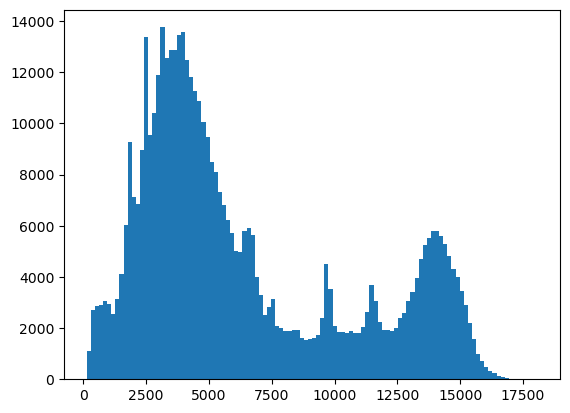

In [6]:
energy_hist = plt.hist(evt_data['energy'], bins='auto')

In [7]:
ii = np.in1d(evt_data['ccd_id'], [0, 1, 2, 3])
np.sum(ii)

434858

Text(0, 0.5, 'y')

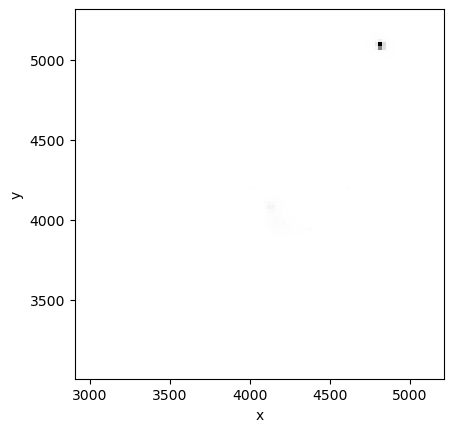

In [8]:
NBINS = (100,100)

img_zero, yedges, xedges = np.histogram2d(evt_data['x'][ii], evt_data['y'][ii], NBINS)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(img_zero, extent=extent, interpolation='nearest', cmap='gist_yarg', origin='lower')

plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

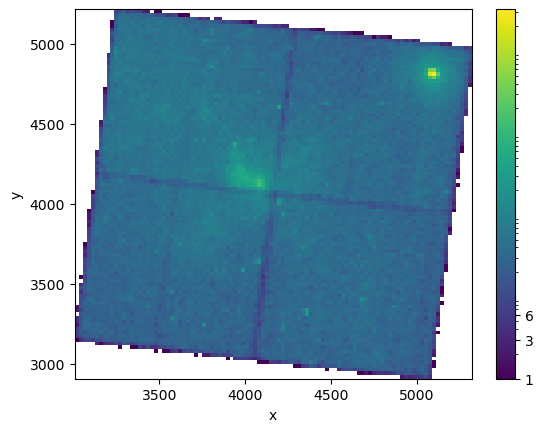

In [9]:
NBINS = (100,100)
img_zero_mpl = plt.hist2d(evt_data['x'][ii], evt_data['y'][ii], NBINS, 
                          cmap='viridis', norm=LogNorm())

cbar = plt.colorbar(ticks=[1.0,3.0,6.0])
cbar.ax.set_yticklabels(['1','3','6'])

plt.xlabel('x')
plt.ylabel('y')

In [10]:
hdu_list.close()